In [1]:
import numpy as np
import pandas as pd
import urllib
from sodapy import Socrata
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')
#plt.rcParams['figure.figsize'] = (30, 10)
#plt.rcParams['font.size'] = 14
%matplotlib inline
sns.set_style("whitegrid")
#sns.set(rc={"figure.figsize": (15, 10)})
sns.set_palette("colorblind")

In [ ]:
client = Socrata("data.montgomeryal.gov", None)
results = client.get("7uyp-bn27", limit=18000)
raw_data = pd.DataFrame.from_records(results)
#create copy of raw_data as data
df = raw_data.sort_index()

In [ ]:
#save the file to a csv locally for off-line retrieval
df.to_csv('C:/Users/595217/general-assembly/project-final/data/mgm.csv')

In [2]:
#open the locally saved csv
df = pd.read_csv('C:/Users/595217/general-assembly/project-final/data/mgm.csv', index_col=0)

In [3]:
def cleanup(dataframe=df):
    """This function converts columns to appropriate dtypes and resets the index."""
    
    cat_cols = pd.Index(['jobtype', 'licensefeetype', 'permitstatus', 'subdiv', 'usetype', 'zoning', 'permittypecode'])
    dataframe[cat_cols] = dataframe[cat_cols].apply(pd.Categorical)
    
    num_cols = pd.Index(['estimatedcost', 'totalfee'])
    dataframe[num_cols] = dataframe[num_cols].apply(pd.to_numeric, errors='coerce')
    
    dataframe['physical_location_zip'] = dataframe['physical_location_zip'].fillna(0).astype(np.int64)
    
    dataframe['issueddate'] = pd.DatetimeIndex(dataframe['issueddate'])

    dataframe['estimatedcost'] = dataframe['estimatedcost'].fillna(0) #replace null values with 0s
    dataframe['totalfee'] = dataframe['totalfee'].fillna(0) #replace null values with 0s
    
    dataframe['parcelno_clean'] = dataframe.parcelno.str.replace(" ", "").str.replace(".", "") #create a new columns with no spaces or periods in parcelno
    dataframe['parcelno_clean'] = dataframe['parcelno_clean'].fillna(0).astype(np.int64)
    
    drop_cols = ['contractors_location_address', 'issueddate',
       'contractors_location_city', 'contractors_location_state',
       'contractors_location_zip', 'contractorsaddress', 'contractorscity',
       'contractorsemail', 'contractorsphone',
       'contractorsstate', 'contractorszip', 'month', 'owndersaddress',
       'ownderszip', 'owners_location_address',
       'owners_location_city', 'owners_location_state', 'owners_location_zip',
       'ownerscity', 'ownersstate', 'permitstatus',
       'physicaladdress', 'physicalcity',
       'physicalstate', 'physicalzip', 'year']
    dataframe.drop(columns=drop_cols, inplace=True)
    
    dataframe = dataframe.reset_index()

cleanup()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17669 entries, 0 to 17668
Data columns (total 22 columns):
contractors_location         11884 non-null object
contractorsname              17669 non-null object
description                  17669 non-null object
estimatedcost                17669 non-null float64
jobtype                      17669 non-null category
licensefeetype               16278 non-null category
owners_location              14136 non-null object
ownersname                   17643 non-null object
parcelno                     17599 non-null object
permitno                     17669 non-null object
permittypecode               17669 non-null category
permittypedescription        17669 non-null object
physical_location            16364 non-null object
physical_location_address    17669 non-null object
physical_location_city       17666 non-null object
physical_location_state      17639 non-null object
physical_location_zip        17669 non-null int64
subdiv            

In [111]:
for col, typ in df.dtypes.items():
    print("|",col,"|",typ,"|")

| contractors_location | object |
| contractorsname | object |
| description | object |
| estimatedcost | float64 |
| jobtype | category |
| licensefeetype | category |
| owners_location | object |
| ownersname | object |
| parcelno | object |
| permitno | object |
| permittypecode | category |
| permittypedescription | object |
| physical_location | object |
| physical_location_address | object |
| physical_location_city | object |
| physical_location_state | object |
| physical_location_zip | int64 |
| subdiv | category |
| totalfee | float64 |
| usetype | category |
| zoning | category |
| parcelno_clean | int64 |


In [113]:
#count how many permits below to each parcelno_clean
df.groupby(by='parcelno_clean').usetype.value_counts().sort_values(ascending=False)

parcelno_clean    usetype    
1004181036002000  Commercial     72
1004181001001000  Commercial     72
905212000001006   Commercial     69
904201007007000   Commercial     55
0                 Residential    54
1003073301024000  Commercial     47
909291000005001   Commercial     46
909301000001014   Commercial     44
906232000003017   Commercial     43
903084000005000   Commercial     42
1005211002001004  Commercial     41
1002101007006000  Commercial     40
905211000001042   Commercial     37
1007351007001000  Commercial     34
1406140000001000  Commercial     33
906231000002012   Commercial     33
1003073303030000  Commercial     32
1006234007003000  Commercial     31
1005162012006000  Commercial     29
905221000001002   Commercial     28
1002092013002000  Commercial     28
1004181002001001  Commercial     28
905163000001040   Commercial     28
905211000001000   Commercial     27
909294000001003   Commercial     27
1006242001010000  Commercial     27
1009321001012000  Commercial     2

In [114]:
len(df.zoning.value_counts().sort_index())

292

In [115]:
df[df.zoning.isna()]

,contractors_location,contractorsname,description,estimatedcost,jobtype,licensefeetype,owners_location,ownersname,parcelno,permitno,...,physical_location,physical_location_address,physical_location_city,physical_location_state,physical_location_zip,subdiv,totalfee,usetype,zoning,parcelno_clean
12,"{'type': 'Point', 'coordinates': [-85.523877, ...",RABREN GENERAL CONTRACTORS INC,ERECT A 32' X 34' TWO/THREE STORY BRICK VENEER...,269734.0,New,NaN,"{'type': 'Point', 'coordinates': [-86.329254, ...",HOUSING AUTHORITY,10 04 18 1 004 019.000,B150078,...,"{'type': 'Point', 'coordinates': [-86.294105, ...",550 HANK WAY,MONTGOMERY,AL,0,NaN,0.0,Commercial,NaN,1004181004019000
16,"{'type': 'Point', 'coordinates': [-86.281373, ...",GUYETTES CONTRACTING LLC,GENERAL REPAIRS TO EXISTING SINGLE FAMILY DWEL...,190000.0,Repair,Building Fee,"{'type': 'Point', 'coordinates': [-86.15941, 3...",FLORENCE ROBERT W & BETTY M,09 02 09 1 000 109.000,B160414,...,"{'type': 'Point', 'coordinates': [-86.15941, 3...",7306 PINETOP CT,MONTGOMERY,AL,0,LAKE FOREST II,475.0,Residential,NaN,902091000109000
55,"{'type': 'Point', 'coordinates': [-86.031499, ...",SDS PROPERTY GROUP LLC,ALTERATIONS TO EXISTING 1200SF TENANT SPACE OF...,90000.0,Alteration,Building Fee,NaN,ALFA INSURANCE,09 05 21 1 000 001.042,B150044,...,"{'type': 'Point', 'coordinates': [-86.155565, ...",7726 EASTCHASE PKWY,MONTGOMERY,AL,0,EASTCHASE 22,225.0,Commercial,NaN,905211000001042
71,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON,"ERECT A 39'4"" X 42'2"" TWO STORY BRICK/SIDING S...",144000.0,New,Lic Fee,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON INC BIRMINGHAM,16 03 06 3 000 007.053,B141566,...,"{'type': 'Point', 'coordinates': [-86.201688, ...",5720 BLEVINS CIR,MONTGOMERY,AL,0,WILDWOOD AT TALOR LAKES 3,360.0,Residential,NaN,1603063000007053
95,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON,GRADING PERMIT TO ERECT A 48' X 36.8' TWO STOR...,0.0,New,NaN,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON,16 03 06 3 000 007.056,BG141432,...,"{'type': 'Point', 'coordinates': [-86.201468, ...",5732 BLEVINS CIR,MONTGOMERY,AL,0,WILDWOOD AT TALOR LAKES 3,0.0,Residential,NaN,1603063000007056
121,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON,GRADING PERMIT TO ERECT A 48' X 36.8' TWO STOR...,0.0,New,NaN,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON INC-BIRMINGHAM,16 03 06 3 000 007.054,BG141667,...,"{'type': 'Point', 'coordinates': [-86.201615, ...",5724 BLEVINS CIR,MONTGOMERY,AL,0,WILDWOOD AT TALOR LAKES 3,0.0,Residential,NaN,1603063000007054
150,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON,ERECT A 39' X 60' ONE STORY BRICK/SIDING SING...,106000.0,New,Lic Fee,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON,16 02 03 0 008 034.000,B160370,...,"{'type': 'Point', 'coordinates': [-86.139406, ...",9360 ALPINE PARK CT,MONTGOMERY,AL,0,NEW PARK 5B CORR,265.0,Residential,NaN,1602030008034000
191,"{'type': 'Point', 'coordinates': [-86.187505, ...",LOWDER NEW HOMES,ERECT A 52' X 76' ONE STORY BRICK VENEER SINGL...,150000.0,New,Lic Fee,"{'type': 'Point', 'coordinates': [-86.187022, ...",LOWDER NEW HOMES,09 08 33 0 001 020.000,B172100,...,NaN,8543 SUNRISE LOOP,MONTGOMERY,AL,0,STURBRIDGE 26 CORR,375.0,Residential,NaN,908330001020000
198,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON,ERECT A 38' X 56' TWO STORY BRICK/SIDING SINGL...,162000.0,New,Building Fee,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON,16 02 03 0 008 039.000,B160479,...,NaN,9412 ALPINE PARK CT,MONTGOMERY,AL,0,NEW PARK 5B CORR,405.0,Residential,NaN,1602030008039000
207,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON,GRADING PERMIT TO ERECT A 39' X 60' ONE STORY...,0.0,New,NaN,"{'type': 'Point', 'coordinates': [-86.788261, ...",D R HORTON,16 02 03 0 008 034.000,BG160371,...,"{'type': 'Point', 'coordinates': [-86.139406, ...",9360 ALPINE PARK CT,MONTGOMERY,AL,0,NEW PARK 5B CORR,0.

In [116]:
import ast

result = ast.literal_eval(df.owners_location[0])

assert type(result) is dict

for key, value in result.items():
    print(key)

type
coordinates


In [11]:
import json

def string_to_dict(dict_string):
    # Convert to proper json format
    dict_string = dict_string.replace("'", '\"')
    return json.loads(dict_string)

df.CoordDicts = df.contractors_location.apply(string_to_dict)

df.contractors_location

AttributeError: 'float' object has no attribute 'replace'

In [12]:
df.contractors_location[0]

"{'type': 'Point', 'coordinates': [-86.188228, 32.289181]}"

In [13]:
def value(item):
    return item[item.find('=')+1:]

In [14]:
{i:value for i in range(5)}

{0: <function __main__.value>,
 1: <function __main__.value>,
 2: <function __main__.value>,
 3: <function __main__.value>,
 4: <function __main__.value>}

## Use Type Values not Logical
Use type values do not seem to logically follow the description.  For example, "Accessory Structure/Satellite Residential" has 10 Commercial values.  Another, "Additions, Residential" contains 20 Commercial values, while 4,042 values seem appropriately labeled Residential.

In [127]:
df.groupby(['usetype', 'permittypedescription', 'description']).usetype.value_counts()

usetype      permittypedescription                      description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      usetype    
Commercial   Accessory Structure/Satellite Commercial   ERECT A 10' X 18' DETACHED STORAGE BUILDING ON VACANT LOT. PLANNING CONTROLS APPROVAL PER JAMES CENTER. TO BE USED FOR STORAGE ONLY. TO MEET ALL APPLICABLE CODES.                                                                                                                                                                                         

In [119]:
df[(df.usetype == 'Commercial') & (df.permittypedescription == 'Accessory Structure/Satellite Residential')].head()

,contractors_location,contractorsname,description,estimatedcost,jobtype,licensefeetype,owners_location,ownersname,parcelno,permitno,...,physical_location,physical_location_address,physical_location_city,physical_location_state,physical_location_zip,subdiv,totalfee,usetype,zoning,parcelno_clean
2185,"{'type': 'Point', 'coordinates': [-86.255538, ...",MONTGOMERY SMALL MOTORS,ERECT A 20'X 30' OPEN STORAGE COMMERCIAL BUILD...,12000.0,Addition,Building Fee,"{'type': 'Point', 'coordinates': [-81.31013, 2...",HABER ANDREW & HABER DANIEL,10 05 15 3 003 004.000,B151531,...,"{'type': 'Point', 'coordinates': [-86.255538, ...",3372 HARRISON RD,MONTGOMERY,AL,0,LOCH HAVEN INDUSTRIAL 5,30.0,Commercial,R-75-s,1005153003004000
2590,"{'type': 'Point', 'coordinates': [-86.255538, ...",MONTGOMERY SMALL MOTORS,ERECT A 20'X 30' OPEN STORAGE COMMERCIAL BUILD...,12000.0,Addition,Lic Fee,"{'type': 'Point', 'coordinates': [-81.31013, 2...",HABER ANDREW & HABER DANIEL,10 05 15 3 003 004.000,B151531,...,"{'type': 'Point', 'coordinates': [-86.255538, ...",3372 HARRISON RD,MONTGOMERY,AL,0,LOCH HAVEN INDUSTRIAL 5,30.0,Commercial,R-75-s,1005153003004000
10776,"{'type': 'Point', 'coordinates': [-86.847978, ...",FRAVERT SERVICES INC,REPLACE A 90''X48'' DIRECTIONAL SIGN. FOOTING...,4000.0,Existing,Building Fee,NaN,HEALTH CARE AUTHORITY FOR,09 03 08 4 000 005.000,B140634,...,"{'type': 'Point', 'coordinates': [-86.172095, ...",400 TAYLOR RD,MONTGOMERY,AL,0,UNIVERSITY MEDICAL CENTER 2,10.0,Commercial,INST,903084000005000
11110,"{'type': 'Point', 'coordinates': [-86.847978, ...",FRAVERT SERVICES INC,REPLACE A 90''X48'' DIRECTIONAL SIGN. FOOTING...,4000.0,Existing,Lic Fee,NaN,HEALTH CARE AUTHORITY FOR,09 03 08 4 000 005.000,B140634,...,"{'type': 'Point', 'coordinates': [-86.172095, ...",400 TAYLOR RD,MONTGOMERY,AL,0,UNIVERSITY MEDICAL CENTER 2,10.0,Commercial,INST,903084000005000
13521,"{'type': 'Point', 'coordinates': [-84.303301, ...",JERRY L JOHNSON AND ASSOCIATES INC,ALTERATIONS TO EXISTING COMMERCIAL STRUCTURE T...,190000.0,Existing,Lic Fee,NaN,BELLSOUTH TELECOMMUNICATIONS,09 06 13 3 000 006.002,B140149,...,"{'type': 'Point', 'coordinates': [-86.119048, ...",10494 US HWY 80,MONTGOMERY,AL,36117,KERSHAW COMMERCIAL PARK 1,475.0,Commercial,M-1,906133000006002


In [117]:
df.pivot_table(index = ['permittypedescription', 'licensefeetype'], columns = 'usetype', values = 'totalfee', aggfunc='count')

usetype                                                             Commercial  \
permittypedescription                              licensefeetype                
Accessory Structure/Satellite Commercial           Base Permit Fee         1.0   
                                                   Building Fee            1.0   
                                                   Lic Fee                 1.0   
                                                   MISC                    NaN   
                                                   Permit Fee              NaN   
                                                   State Craft Fee         1.0   
Accessory Structure/Satellite Residential          Base Permit Fee         NaN   
                                                   Building Fee            5.0   
                                                   Lic Fee                 5.0   
                                                   MISC                    NaN   
                                                   Permit Fee              NaN   
                                                   State Craft Fee         NaN   
Addition, Commercial                               Base Permit Fee        28.0   
                                                   Building Fee         1011.0   
                                                   Lic Fee               999.0   
                                                   MISC                   42.0   
                                                   Permit Fee              1.0   
                                                   State Craft Fee       233.0   
Additions, Residential                             Base Permit Fee         1.0   
                                                   Building Fee            9.0   
                                                   Lic Fee                 8.0   
                                                   MISC                    NaN   
                                                   Permit Fee              NaN   
                                                   State Craft Fee         1.0   
Alteration/Rennovation Commercial                  Base Permit Fee       217.0   
                                                   Building Fee          217.0   
                                                   Lic Fee               215.0   
                                                   MISC                   34.0   
                                                   Permit Fee              NaN   
                                                   State Craft Fee       216.0   
...                                                                        ...   
Townhouse                                          Base Permit Fee         NaN   
                                                   Building Fee            NaN   
                                                   Lic Fee                 NaN   
                                                   MISC                    NaN   
                                                   Permit Fee              NaN   
                                                   State Craft Fee         NaN   
Two Family Dwelling                                Base Permit Fee         NaN   
                                                   Building Fee            NaN   
                                                   Lic Fee                 NaN   
                                                   MISC                    NaN   
                                                   Permit Fee              NaN   
                                                   State Craft Fee         NaN   
WORKING PERMITS FOR MASTER B437                    Base Permit Fee         NaN   
                                                   Building Fee            NaN   
                                                   Lic Fee                 NaN   
                                                   MISC         

In [16]:
df.pivot_table(index = ['usetype', 'permittypedescription'], columns = ['licensefeetype'], values = 'totalfee', aggfunc='count')

licensefeetype                                                  Base Permit Fee  \
usetype     permittypedescription                                                 
Commercial  Accessory Structure/Satellite Commercial                        1.0   
            Accessory Structure/Satellite Residential                       NaN   
            Addition, Commercial                                           28.0   
            Additions, Residential                                          1.0   
            Alteration/Rennovation Commercial                             217.0   
            Alteration/Rennovation Residential                              4.0   
            Amusement and Recreation                                        4.0   
            Billboard Sign                                                  NaN   
            Certificate of Occupancy                                        3.0   
            Change of Occupancy                                             NaN   
            Churches & Religious                                            NaN   
            Demolition Residential                                          NaN   
            Demolition, Commercial                                          NaN   
            Demolition, Garage/Detached Commercial                          NaN   
            Demolition, Garage/Detached Residential                         NaN   
            Driveway Curb Cut Commercial                                    NaN   
            Driveway Curb Cut Residential                                   NaN   
            ERROR MADE - NO PERMIT                                          NaN   
            Fence/Retaining Walls Commercial                                NaN   
            Fence/Retaining Walls Residential                               NaN   
            Five or More Family Apartments - Master Permit                  NaN   
            GRADING PERMIT COMMERCIAL                                       NaN   
            GRADING PERMIT RESIDENTIAL                                      NaN   
            Garages, Carports, Etc.                                         NaN   
            Hospitals, Institutional, Etc.                                  2.0   
            Hotels, Motels, Etc.                                            1.0   
            Industrial                                                      2.0   
            Install Underground Cable                                       NaN   
            Master Permit Mixed Use                                         NaN   
            Modular/Manufactured Commercial/Single                          NaN   
...                                                                         ...   
Residential Five or More Family Apartments - Master Permit                  NaN   
            GRADING PERMIT COMMERCIAL                                       NaN   
            GRADING PERMIT RESIDENTIAL                                      NaN   
            Garages, Carports, Etc.                                        14.0   
            Hospitals, Institutional, Etc.                                  NaN   
            Hotels, Motels, Etc.                                            NaN   
            Industrial                                                      NaN   
            Install Underground Cable                                       NaN   
            Master Permit Mixed Use                                         NaN   
            Modular/Manufactured Commercial/Single                          NaN   
            Modular/Manufactured Residential/Double +                       NaN   
            Modular/Manufactured Residential/Single                         1.0   
            New Single Family Residence                                   224.0   
            Office, Banks & Professional                                    NaN   
            Other Non-Resid., Mobile Office, Etc.                           NaN   
            Pati

In [47]:
#Make a table of the Use Types and their percentages of the total 
table = df.pivot_table(values='totalfee', index='permittypedescription', columns='usetype', aggfunc=len)
table.info()
#table.sum(axis=1)
#table['%Commercial'] = ((table['Commercial'] / totals ) * 100)
# table['%Mixed'] = ((table['Mixed Occupancy'] / table['Total']) * 100)
# table['%Residential'] = ((table['Residential'] / table['Total']) * 100)
# table

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Accessory Structure/Satellite Commercial to Working Permit Mixed Use
Data columns (total 3 columns):
Commercial         39 non-null float64
Mixed Occupancy    7 non-null float64
Residential        29 non-null float64
dtypes: float64(3)
memory usage: 1.6+ KB


In [36]:
table

usetype,Commercial,Mixed Occupancy,Residential
permittypedescription,,,
Accessory Structure/Satellite Commercial,4.0,NaN,NaN
Accessory Structure/Satellite Residential,10.0,2.0,340.0
"Addition, Commercial",2341.0,2.0,41.0
"Additions, Residential",20.0,NaN,4042.0
Alteration/Rennovation Commercial,924.0,NaN,25.0
Alteration/Rennovation Residential,12.0,NaN,1588.0
Amusement and Recreation,25.0,NaN,NaN
Billboard Sign,28.0,NaN,NaN
Certificate of Occupancy,686.0,NaN,9.0


In [35]:
table[['%Commercial', '%Mixed', '%Residential']].dropna(thresh=2).plot(kind='barh')
plt.figure(figsize=(30,10));

KeyError: 'a list-indexer must only include values that are in the categories'

In [ ]:
df.pivot_table(values=['estimatedcost', 'totalfee'], index=['licensefeetype', 'jobtype'] , columns='usetype')

In [ ]:
df.licensefeetype.value_counts().plot(kind='bar');

In [ ]:
df.usetype.value_counts().plot(kind='bar');

## Contractors by Building Permits

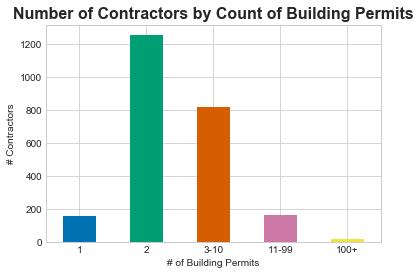

In [30]:
df.contractorsname.value_counts().sort_index().reset_index()['contractorsname'].value_counts(bins=[0,1,2,10,99,99999999]).sort_index().plot(kind='bar')
plt.xticks((0,1,2,3,4), ['1','2','3-10','11-99','100+'], rotation='horizontal')
plt.title("Number of Contractors by Count of Building Permits", fontdict={'fontsize': 16,'fontweight': 'bold'})
plt.ylabel("# Contractors")
plt.xlabel('# of Building Permits');

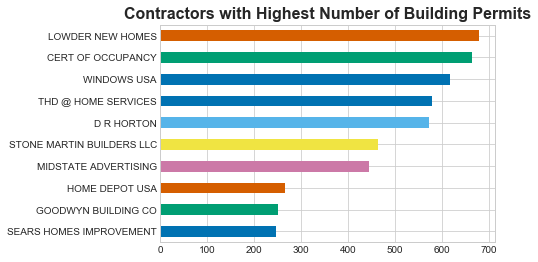

In [31]:
df.contractorsname.value_counts().head(10).sort_values().plot(kind='barh')
plt.title('Contractors with Highest Number of Building Permits', fontdict={'fontsize': 16,'fontweight': 'bold'});

In [ ]:
df.columns

In [32]:
df.drop(labels='physical_location_zip', axis=1)

,contractors_location,contractorsname,description,estimatedcost,jobtype,licensefeetype,owners_location,ownersname,parcelno,permitno,...,permittypedescription,physical_location,physical_location_address,physical_location_city,physical_location_state,subdiv,totalfee,usetype,zoning,parcelno_clean
0,"{'type': 'Point', 'coordinates': [-86.188228, ...",RECON BUILDERS INC,GENERAL REPAIRS TO EXISTING SINGLE FAMILY RESI...,25000.00,Repair,Building Fee,"{'type': 'Point', 'coordinates': [-86.233767, ...",MILLER PRESCILLA M,10 06 23 2 003 068.000,B160512,...,"Additions, Residential","{'type': 'Point', 'coordinates': [-86.233767, ...",4152 DENTON DR,MONTGOMERY,AL,BROOKWOOD ESTATES 2B CORR,62.5,Residential,R-24-T,1006232003068000
1,"{'type': 'Point', 'coordinates': [-86.309313, ...",SDS PROPERTY GROUP LLC,"GRADING PERMIT TP ERECT A 28' X 65'4"" ONE STOR...",0.00,New,NaN,"{'type': 'Point', 'coordinates': [-86.168047, ...",SDS PROPERTY GROUP,09 08 34 0 012 088.000,BG160375,...,GRADING PERMIT RESIDENTIAL,"{'type': 'Point', 'coordinates': [-86.149721, ...",1412 PRAIRIE OAK DR,MONTGOMERY,AL,THORINGTON TRACE 6,0.0,Commercial,PUD,908340012088000
2,"{'type': 'Point', 'coordinates': [-86.180169, ...",S & A CONTRACTING,GENERAL REPAIRS TO EXISTING SINGLE FAMILY FOR ...,5400.00,Repair,Lic Fee,"{'type': 'Point', 'coordinates': [-86.166581, ...",MILLER DEBORAH HAGAN,09 08 28 2 000 027.000,B141450,...,"Additions, Residential","{'type': 'Point', 'coordinates': [-86.166581, ...",2160 HALCYON BLVD,MONTGOMERY,AL,HALCYON BLVD 1,13.5,Residential,R-85,908282000027000
3,NaN,RAMPY DESIGN BUILD,ALTERATION TO AN EXISTING 200 SQ FT ROOM TO AN...,40000.00,Alteration,Lic Fee,NaN,PHILLIPS PAIN MANAGEMENT LLC,09 03 08 4 000 003.006,B172202,...,Alteration/Rennovation Commercial,"{'type': 'Point', 'coordinates': [-86.171291, ...",432 ST LUKES DR,MONTGOMERY,AL,MONTGOMERY EAST PROFESSIONAL,100.0,Commercial,O-1,903084000003006
4,NaN,TRIPLE F LANDSCAPING INC,DEMOLISH A EXISTING WOODEN DWELLING TO CLEAR L...,0.00,Existing,Building Fee,"{'type': 'Point', 'coordinates': [-82.964013, ...",ROBINSON HELLEN & GILCREST RANDY LEE,10 04 18 2 004 016.000,B172201,...,Demolition Residential,"{'type': 'Point', 'coordinates': [-86.300905, ...",558 SOUTH BAINBRIDGE ST,MONTGOMERY,AL,GOLDTHWAITE PLAT,50.0,Residential,T4-R,1004182004016000
5,NaN,RAMPY DESIGN BUILD,ALTERATION TO AN EXISTING 200 SQ FT ROOM TO AN...,40000.00,Alteration,Base Permit Fee,NaN,PHILLIPS PAIN MANAGEMENT LLC,09 03 08 4 000 003.006,B172202,...,Alteration/Rennovation Commercial,"{'type': 'Point', 'coordinates': [-86.171291, ...",432 ST LUKES DR,MONTGOMERY,AL,MONTGOMERY EAST PROFESSIONAL,50.0,Commercial,O-1,903084000003006
6,"{'type': 'Point', 'coordinates': [-81.269049, ...",MERP LLC,DEMOLISH COMMERCIAL STRUCTURE TO CLEAR LOT. B...,9000.00,Existing,Lic Fee,NaN,BISHOP OF MOBILE,11 06 24 2 010 031.000,B141478,...,"Demolition, Commercial","{'type': 'Point', 'coordinates': [-86.322622, ...",830 WEST FAIRVIEW AVE,MONTGOMERY,AL,SAINT JUDE PROPERTY,22.5,Commercial,M-1,1106242010031000
7,"{'type': 'Point', 'coordinates': [-86.228765, ...",FOX CROSSINGS LLC,ALTERATIONS TO EXISTING APARTMENT BUILDING WIT...,0.00,Alteration,NaN,"{'type': 'Point', 'coordinates': [-86.825374, ...",FOX CROSSINGS LLC,10 07 35 1 007 001.000,B160286,...,WORKING PERMITS FOR MASTER B437,"{'type': 'Point', 'coordinates': [-86.228777, ...",3627 GAS LIGHT CUR,MONTGOMERY,AL,CARRIAGE HILLS PLAT D,0.0,Commercial,B-3,1007351007001000
8,"{'type': 'Point', 'coordinates': [-86.290842, ...",MIDSTATE ADVERTISING,INSTALL(3 SETS) OF CHANNEL LETTERS ON FACE OF ...,3000.00,Other,Building Fee,NaN,OLIVER CREEK HOLDINGS LLLP,09 03 08 2 001 010.000,B160447,...,Signs,"{'type': 'Point', 'coordinates': [-86.181064, ...",6631 ATLANTA HWY,MONTGOMERY,AL,OCMTHW80 2,7.5,Commercial,B-3,903082001010000
9,NaN,DESIGNSCAPE HOMES LLC,ERECT A 100' X 104' ONE STORY BRICK VENEER SIN...,600000.00,New,Building Fee,"{'type': 'Point', 'coordinates': [-86.144463, ...",WOODARD MICHAEL & WOODARD DELORIS

In [ ]:
df.corr()

In [ ]:
len(df)

In [ ]:
(df.estimatedcost > 0).sum()

In [ ]:
(df.totalfee > 0).sum()

In [ ]:
df[df.totalfee < 1]

In [ ]:
df.groupby('usetype').estimatedcost.mean()

In [ ]:
sns.boxplot(data=df, x='estimatedcost', y='usetype', hue='usetype');

In [ ]:
plt.scatter('totalfee', 'estimatedcost', data=df[df.usetype=='Commercial'])

In [ ]:
sns.lmplot('totalfee', 'estimatedcost', data=df[df.usetype=='Mixed Occupancy'])

In [ ]:
plt.scatter('totalfee', 'estimatedcost', data=df[df.usetype=='Residential'])

In [ ]:
sns.lmplot('totalfee', 'estimatedcost', data=df, hue='description')

In [ ]:
df[(df['totalfee'] == 0) & (df['estimatedcost'] == 0)]

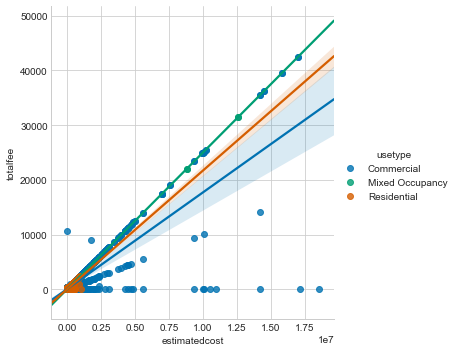

In [29]:
sns.lmplot(data=df, x='estimatedcost', y='totalfee', hue='usetype');

In [28]:
df.groupby('usetype').estimatedcost.agg(['count', 'mean', 'min', 'max']).sort_values('mean')

,count,mean,min,max
usetype,,,,
Residential,10439,4.407791e+04,0.0,1030600.0
Commercial,7210,2.157468e+05,0.0,18500000.0
Mixed Occupancy,20,2.223840e+06,0.0,12618000.0


In [27]:
df.jobtype.value_counts()

New           4825
Existing      4017
Alteration    3096
Repair        2322
Other         2264
Addition      1145
Name: jobtype, dtype: int64

In [26]:
df.corr()

,estimatedcost,physical_location_zip,totalfee,parcelno_clean
estimatedcost,1.000000,0.049145,0.862379,0.000507
physical_location_zip,0.049145,1.000000,0.046309,0.052209
totalfee,0.862379,0.046309,1.000000,-0.000128
parcelno_clean,0.000507,0.052209,-0.000128,1.000000


In [25]:
df[['permitno', 'permittypecode']]

,permitno,permittypecode
0,B160512,B434
1,BG160375,BGR
2,B141450,B434
3,B172202,B437F
4,B172201,B645
5,B172202,B437F
6,B141478,B649
7,B160286,B437B
8,B160447,B702
9,B172203,B101


In [24]:
df.licensefeetype.value_counts()

Building Fee       7541
Lic Fee            6306
Base Permit Fee    1153
State Craft Fee     842
MISC                431
Permit Fee            5
Name: licensefeetype, dtype: int64

In [ ]:
## Create the features and target variables

In [49]:
X = df['description']
y = df['usetype']

In [ ]:
#
X_transformed = full_pipeline.fit_transform(X)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.20, random_state=42)

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
bow_converter = CountVectorizer(token_pattern='(?u)\\b\\w+\\b')
bigram_converter = CountVectorizer(ngram_range=(2,2), token_pattern='(?u)\\b\\w+\\b')
trigram_converter = CountVectorizer(ngram_range=(3,3), token_pattern='(?u)\\b\\w+\\b')

In [11]:
bow_converter.fit(df['description'])
words = bow_converter.get_feature_names()
bigram_converter.fit(df['description'])
bigrams = bigram_converter.get_feature_names()
trigram_converter.fit(df['description'])
trigrams = trigram_converter.get_feature_names()
print(len(words), len(bigrams), len(trigrams))

9131 36285 63569


In [22]:
descrip = df[['description', 'usetype']]

In [19]:
from sklearn.model_selection import train_test_split

In [ ]:
training data, test_data = ModuleNotFoundError

In [ ]:
bow_transform = text.CountVectorizer(

## Import natural language processing tools

In [6]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [7]:
example_sent = df.description[0]
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(example_sent)

filtered_sentence = [w for w in word_tokens if not w in stop_words]

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['GENERAL', 'REPAIRS', 'TO', 'EXISTING', 'SINGLE', 'FAMILY', 'RESIDENCE', 'DUE', 'TO', 'FIRE', 'DAMAGE', '.', 'FRAMING', ',', 'ELEC', 'AND', 'PLUMBING', 'INSPECTION', 'WILL', 'BE', 'REQUIRED', '.', 'TO', 'MEET', 'ALL', 'APPLICABLE', 'CODES', '.']
['GENERAL', 'REPAIRS', 'TO', 'EXISTING', 'SINGLE', 'FAMILY', 'RESIDENCE', 'DUE', 'TO', 'FIRE', 'DAMAGE', '.', 'FRAMING', ',', 'ELEC', 'AND', 'PLUMBING', 'INSPECTION', 'WILL', 'BE', 'REQUIRED', '.', 'TO', 'MEET', 'ALL', 'APPLICABLE', 'CODES', '.']


In [8]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [20]:
from nltk.tokenize import PunktSentenceTokenizer

In [21]:
train_text = df.description[0]
sample_text = df.description[0]

custom_sent_tokenizer = PunktSentenceTokenizer(train_text)

tokenized = custom_sent_tokenizer.tokenize(sample_text)

def process_content():
    try:
        for i in tokenized:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)
            chunkGram = r"""Chunk: {<RB.?>*<VB.?>*<NNP>+<NN>?}"""
            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)
            
            print(chunked)
            for subtree in chunked.subtrees(filter=lambda t: t.label() == 'Chunk'):
                print(subtree)

            chunked.draw()

    except Exception as e:
        print(str(e))

process_content()

(S
  (Chunk
    GENERAL/NNP
    REPAIRS/NNP
    TO/NNP
    EXISTING/NNP
    SINGLE/NNP
    FAMILY/NNP
    RESIDENCE/NNP
    DUE/NNP
    TO/NNP
    FIRE/NNP
    DAMAGE/NNP)
  ./.)
(Chunk
  GENERAL/NNP
  REPAIRS/NNP
  TO/NNP
  EXISTING/NNP
  SINGLE/NNP
  FAMILY/NNP
  RESIDENCE/NNP
  DUE/NNP
  TO/NNP
  FIRE/NNP
  DAMAGE/NNP)


KeyboardInterrupt: 

In [22]:
def process_content():
    try:
        for i in tokenized[5:]:
            words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(words)

            chunkGram = r"""Chunk: {<.*>+}
                                    }<VB.?|IN|DT|TO>+{"""

            chunkParser = nltk.RegexpParser(chunkGram)
            chunked = chunkParser.parse(tagged)

            chunked.draw()

    except Exception as e:
        print(str(e))

process_content()

In [14]:
print(word_tokenize(df.description[0]))

['GENERAL', 'REPAIRS', 'TO', 'EXISTING', 'SINGLE', 'FAMILY', 'RESIDENCE', 'DUE', 'TO', 'FIRE', 'DAMAGE', '.', 'FRAMING', ',', 'ELEC', 'AND', 'PLUMBING', 'INSPECTION', 'WILL', 'BE', 'REQUIRED', '.', 'TO', 'MEET', 'ALL', 'APPLICABLE', 'CODES', '.']


## This is a working model using Logistic Regression and tf-idf!

In [62]:
from sklearn.feature_extraction import text
import sklearn.preprocessing as preproc
from sklearn.linear_model import LogisticRegression

In [54]:
bow_transform = text.CountVectorizer()
X_tr_bow = bow_transform.fit_transform(X_train)
X_te_bow = bow_transform.transform(X_test)
len(bow_transform.vocabulary_)

8656

In [55]:
#create a copy of the target variables
y_tr = y_train
y_te = y_test

In [63]:
tfidf_trfm = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_trfm.transform(X_te_bow)
#l2-normalize the bow representations
X_tr_l2 = preproc.normalize(X_tr_bow, axis=0)
X_te_l2 = preproc.normalize(X_te_bow, axis=0)

In [118]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description, _C=1.0):
    ### Helper function to train a logistic classifier and score on the test data
    m = LogisticRegression().fit(X_tr, y_tr)
    s = m.score(X_test, y_test)
    print('Test score with', description, 'features:', s)
    return m

In [119]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized')
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')

Test score with bow features: 0.9886813808715337
Test score with l2-normalized features: 0.9799094510469722
Test score with tf-idf features: 0.9920769666100736


In [120]:
import sklearn.model_selection as modsel
#specifying the search grid
param_grid_ = {'C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2]}
#tune classifier for each
bow_search = modsel.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_, return_train_score=True)
l2_search = modsel.GridSearchCV(LogisticRegression(), cv=5,param_grid=param_grid_, return_train_score=True)
tfidf_search = modsel.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_, return_train_score=True)

In [121]:
#tune classifier for bag-of-words representation
bow_search.fit(X_tr_bow, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [122]:
bow_search.best_score_

0.9920056597099398

In [123]:
#tune classifier for l2-normalized word vector
l2_search.fit(X_tr_l2, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [124]:
l2_search.best_score_

0.9886098337460205

In [125]:
tfidf_search.fit(X_tr_tfidf, y_tr)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [126]:
tfidf_search.best_score_

0.9924301379554298

In [127]:
tfidf_search.cv_results_

{'mean_fit_time': array([0.19183869, 0.39539824, 0.84901385, 1.27164459, 1.35859895,
        1.64016933]),
 'mean_score_time': array([0.00200353, 0.00312943, 0.00312853, 0.00625615, 0.00312839,
        0.0093864 ]),
 'mean_test_score': array([0.94778918, 0.98323311, 0.99243014, 0.99193491, 0.98960028,
        0.98790237]),
 'mean_train_score': array([0.94918643, 0.98526707, 0.99830207, 0.99904493, 0.99936329,
        0.99941635]),
 'param_C': masked_array(data=[1e-05, 0.001, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05},
  {'C': 0.001},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0}],
 'rank_test_score': array([6, 5, 1, 2, 3, 4]),
 'split0_test_score': array([0.95155587, 0.98408769, 0.99115983, 0.99151344, 0.9893918 ,
        0.98727016]),
 'split0_train_score': array([0.94852746, 0.98496507, 0.99823118, 0.99911559, 0.99946936,
        0.99946936]),
 'split1_

In [83]:
import pickle

In [128]:
results_file = open('tfidf_gridcv_results.pkl', 'wb')
pickle.dump(bow_search, results_file, -1)
pickle.dump(tfidf_search, results_file, -1)
pickle.dump(l2_search, results_file, -1)
results_file.close()

In [129]:
pkl_file = open('tfidf_gridcv_results.pkl', 'rb')
bow_search = pickle.load(pkl_file)
tfidf_search = pickle.load(pkl_file)
l2_search = pickle.load(pkl_file)
pkl_file.close()

In [130]:
search_results = pd.DataFrame.from_dict({'bow': bow_search.cv_results_['mean_test_score'],
                               'tfidf': tfidf_search.cv_results_['mean_test_score'],
                               'l2': l2_search.cv_results_['mean_test_score']})
search_results

,bow,l2,tfidf
0,0.854404,0.589954,0.947789
1,0.964273,0.589954,0.983233
2,0.986629,0.809056,0.992430
3,0.989176,0.961372,0.991935
4,0.992006,0.981889,0.989600
5,0.990308,0.988610,0.987902


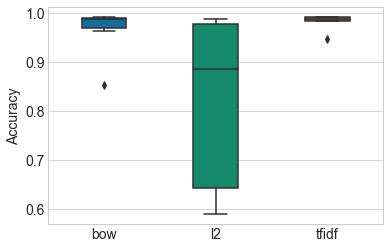

In [131]:
ax = sns.boxplot(data=search_results, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize=14)

plt.savefig('tfidf_gridcv_results.png')

In [132]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow', _C=bow_search.best_params_['C'])
m2 = simple_logistic_classify(X_tr_l2, y_tr, X_te_l2, y_te, 'l2-normalized', 
                              _C=l2_search.best_params_['C'])
m3 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf', 
                              _C=tfidf_search.best_params_['C'])

Test score with bow features: 0.9886813808715337
Test score with l2-normalized features: 0.9799094510469722
Test score with tf-idf features: 0.9920769666100736
